## <p style="font-weight:bold; color:#00747b; font-size:140%; text-align:left;padding: 0; margin: 0; border-bottom: 3px solid #00747b"> Source Code and Utils Work </p>

<div style="border-radius:10px; border:#590d0d solid; padding: 15px; background-color: #d4ebea; font-size:100%; text-align:left">

In this we create some utils functions. Based on the idea that we do a monolith notebook they take place in this cell. As we further
the notebook the utils functions here will be transfereed to a utlis/src directory as appropriate </div>

In [66]:
import time
from datetime import datetime
import numpy as np
import pickle
import logging
import inspect
import sklearn
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, Dict
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier

In [36]:
"""
In this we create some utils functions. Based on the idea that we do a monolith notebook they take place in this cell. As we further 
the notebook the utils functions here will be transfereed to a utlis/src directory as appropriate
"""
from enum import Enum

class Models(Enum):
    """
    Enum class to help with typing and auto-completion in the IDE
    """
    GRADIENT_BOOSTING = 'Gradient Boosting',
    GAUSSIAN_NB = 'Gaussian Naive Bayes',
    LOG_REGRESSION = 'Logistic Regression',
    MLP_CLASSIFIER = 'MLP Classifier',
    KNN = 'KNN',
    RANDOM_FOREST = 'Random Forest',
    DECISION_TREE = 'Decision Tree',




In [37]:

class ModelFactory:
    """
    Factory class the implements methods for the creation of models and their search spaces. The Factory is by
    design stateless (not attributes that needs to be instantiated)
    """
    def generate_model_and_search_space(self, mdl_type: Models) -> Tuple:
        """
        Method that return the chosen model instance as well as a search space for optimization
        :param mdl_type: Type of model. If not implemented raise error.
        :return: Tuple of model
        """
        model = self._get_model(mdl_type)
        search_space = self._get_search_space(mdl_type)
        return model, search_space

    def _get_model(self, mdl_type: Models):
        """
        Method to fetch the correct model type
        :param mdl_type: the type to model based on the Enum model class
        :return: an Instance of the model
        """
        if mdl_type == Models.GRADIENT_BOOSTING:
            return GradientBoostingClassifier(n_estimators=50,
                                                  learning_rate=0.09,
                                                  max_depth=5,
                                                  verbose=True)
        elif mdl_type == Models.GAUSSIAN_NB:
            return GaussianNB()
        elif mdl_type == Models.MLP_CLASSIFIER:
            return MLPClassifier(solver='adam',
                                     alpha=1e-5,
                                     hidden_layer_sizes=(5, 2),
                                     random_state=1,
                                     max_iter=1000,
                                     verbose=True)
        elif mdl_type == Models.KNN:
            return KNeighborsClassifier(n_neighbors=5)
        elif mdl_type == Models.RANDOM_FOREST:
            return RandomForestClassifier(n_estimators = 100)
        elif mdl_type == Models.DECISION_TREE:
            return DecisionTreeClassifier(random_state=42, max_depth=2)
        elif mdl_type == Models.LOG_REGRESSION:
            return linear_model.LogisticRegression()
        # solver = 'liblinear',C=10, penalty='l2', max_iter = 1000
        else:
            raise NotImplementedError

    def _get_search_space(self, mdl_type: Models):
        """
        A method to get the hyperparameter serach space
        :param mdl_type:  mdl_type: the type to model based on the Enum model class
        :return:  The Hyperparameter serach space
        """
        space = dict()
        if mdl_type == Models.GRADIENT_BOOSTING:
            logging.warning("The search space for %s has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.GAUSSIAN_NB:
            logging.warning("The search space for %s has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.MLP_CLASSIFIER:
            logging.warning("The search space for %s has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.KNN:
            logging.warning("The search space for %s has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.RANDOM_FOREST:
            space['bootstrap'] = [False, True]
            space['max_features'] = ['log2', 'sqrt']
            space['n_estimators'] = [50, 100, 150, 200]
            return space
        elif mdl_type == Models.DECISION_TREE:
            warnings.warn("The search space for the {} has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.LOG_REGRESSION:
            space['solver'] = ['newton-cg', 'lbfgs']
            space['penalty'] = ['l2', 'none']
            space['C'] = [1, 10, 20, 50]
            return space
        else:
            raise NotImplementedError


In [38]:
class Experiment(object):
    """
    A Class to help with running experiments. Also supports using with the "with" keyword. The actual functionalities are pretty basic since the core idea is to
    be replaced with the mlflow runner
    """

    def __init__(self):
        self.start_time = 0
        self.end_time = 0
        self.model = None
        self.results = None

    def __enter__(self):
        self.start_time = 0
        self.start_time = time.time()
        self.results = None

    def __exit__(self, exc_type, exc_val, exc_tb):
        if self.model is None:
            raise Exception("You need to run run_experiment(<model/hyperparametertuner>). Possible that there was an error in the"
                            "fitting of the model")
        self.end_time = 0
        self.end_time = time.time()
        self.model = None
        logging.info("Elapsed Time %0.3f", self.end_time - self.start_time)
        logging.info("####### End of Experiment ####### \n")


    def run_experiment(self, experiment_object, X_train, X_test, y_train, y_test):
        """
        Runs the experiment based on the type of the object
        :param experiment_object: Object to be fitted. Can be a model or can be
        :param X_train: Training Dataset
        :param X_test:  Test Dataset
        :param y_train: Training Target
        :param y_test: Testing Target
        :return: None
        """
        now = datetime.now()
        timestamp = now.strftime("%d%m%y@%H:%M")
        logging.info(
            "####### Starting Experiment dated {} #######\n".format(
                timestamp
            )
        )
        model, metrics_dict = self._get_model_and_results(experiment_object, X_train, X_test, y_train, y_test)
        pickle.dump(model, open(os.path.join(results_path ,  timestamp + type(model).__name__ + '.pkl'), 'wb'))


    def _get_model_and_results(self, experiment_object, X_train, X_test, y_train, y_test):
        """
        Getter method to help with fitting the different experiment objects.
        :param experiment_object: Object to be fitted. Can be a model or can be
        :param X_train: Training Dataset
        :param X_test:  Test Dataset
        :param y_train: Training Target
        :param y_test: Testing Target
        :return: None
        """
        ensembles = [x[1] for x in inspect.getmembers(sklearn.ensemble, inspect.isclass)]
        tuners = [x[1] for x in inspect.getmembers(sklearn.model_selection)]

        if type(experiment_object) in ensembles:
            logging.info("Model type: %s", type(experiment_object).__name__)
            metrics_dict = {}

            logging.debug("The experiment object is an ensemble")
            experiment_object.fit(X_train, y_train)
            y_pred = experiment_object.predict(X_test)

            metrics_dict['accuracy'] = metrics.accuracy_score(y_test, y_pred) * 100
            metrics_dict['confusion matrix'] = confusion_matrix(y_test, y_pred)
            metrics_dict['classification report'] = classification_report(y_test, y_pred)

            logging.debug('The model is %s', self.model)
            logging.info(metrics_dict['classification report'])

            self.model = experiment_object
            return self.model, metrics_dict

        elif type(experiment_object) in tuners:
            logging.info("Hyperparameter tuining experiment")
            logging.info("Model type: %s", type(experiment_object._estimator_type).__name__)

            metrics_dict = {}
            logging.debug("The experiment object is a tuner ")
            experiment_object.fit(X_train, y_train)

            self.model = experiment_object.best_estimator_

            y_pred = self.model.predict(X_test)

            metrics_dict['accuracy'] = metrics.accuracy_score(y_test, y_pred) * 100
            metrics_dict['confusion matrix'] = confusion_matrix(y_test, y_pred)
            metrics_dict['classification report'] = classification_report(y_test, y_pred)

            metrics_dict['best params'] = search.best_params_
            logging.debug('The model is %s', self.model)
            logging.info("Best parameter (CV score=%0.3f):", search.best_score_)
            logging.info("That following models had the following best parameters %s", search.best_params_)

            return self.model, metrics_dict
        else:
            raise NotImplementedError


In [39]:
script_folder = os.path.dirname(os.path.abspath("__file__"))
destination_path = os.path.join(script_folder, "data")
results_path= os.path.join(script_folder, "results")

logging.basicConfig(level=logging.NOTSET)
logger = logging.getLogger()

factory = ModelFactory()
exp = Experiment()

## <p style="font-weight:bold; color:#00747b; font-size:140%; text-align:left;padding: 0; margin: 0; border-bottom: 3px solid #00747b"> Data Work</p>

####
<div style="border-radius:10px; border:#590d0d solid; padding: 15px; background-color: #d4ebea; font-size:100%; text-align:left">
    
<h2 align="center" style='text-decoration:underline;'> Features in the Dataset</h2>
    

The dataset contains 12 features and the target variable we are trying to predict. We divide features into buckets based on the forest attributes they are describing. 

__Features describing the topography of the forest area__ <br>
> *Elevation*: The “height of the forest” <br>
*Aspect*: The orientation (e.g north-facing) of the slope in degrees (0-360). <br>
*Slope*: How steep the area. Measured precent change in elevation over a certain distance. <br>

__Features describing distance to water__ <br>
> *Horizontal_Distance_To_Hydrology*: Horizontal distance to the nearest water source <br>
*Vertical_Distance_To_Hydrology*: Vertical distance to the nearest water source <br>

__Features describing the lighting source.__ <br>
Here it is important to note that those are related to Elevation, slope and topography <br>
> *Hillshade_9am*: Hillshade index at 9. Measured in how bright that part on a grayscale. (1-255) <br>
*Hillshade_Noon*: Hillshade index at 12. Measured in how bright that part on a grayscale. (1-255) <br>
*Hillshade_3pm*: Hillshade index at 3. Measured in how bright that part on a grayscale. (1-255) <br>

__Features describing relevant for fire hazards/urban accessabilty.__ <br>
> *Horizontal_Distance_To_Roadways:* Distance to the nearest road. While this generally describes how accessible a forest is, it plays a role in fighting wildfires. <br>
*Horizontal_Distance_To_Fire_Points:* Distance to an ignition point in the forest which designates a point where fire is susceptible in a forest. <br>

__Area Code__ <br>
> *Wilderness_Area:*  The area code to which the current forest area belongs to. <br>

__Type of soil present in the described forest area__ <br>
> *Soil_Type:* The type of soil in that area of the forest. <br>

__Target variable__ <br>
> Cover_Type the class to be predicted. The type of forestation cover.<br>

13


array([[<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Aspect'}>,
        <Axes: title={'center': 'Slope'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Hydrology'}>],
       [<Axes: title={'center': 'Vertical_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Roadways'}>,
        <Axes: title={'center': 'Hillshade_9am'}>,
        <Axes: title={'center': 'Hillshade_Noon'}>],
       [<Axes: title={'center': 'Hillshade_3pm'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Fire_Points'}>,
        <Axes: title={'center': 'Wilderness_Area'}>,
        <Axes: title={'center': 'Soil_Type'}>],
       [<Axes: title={'center': 'Cover_Type'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

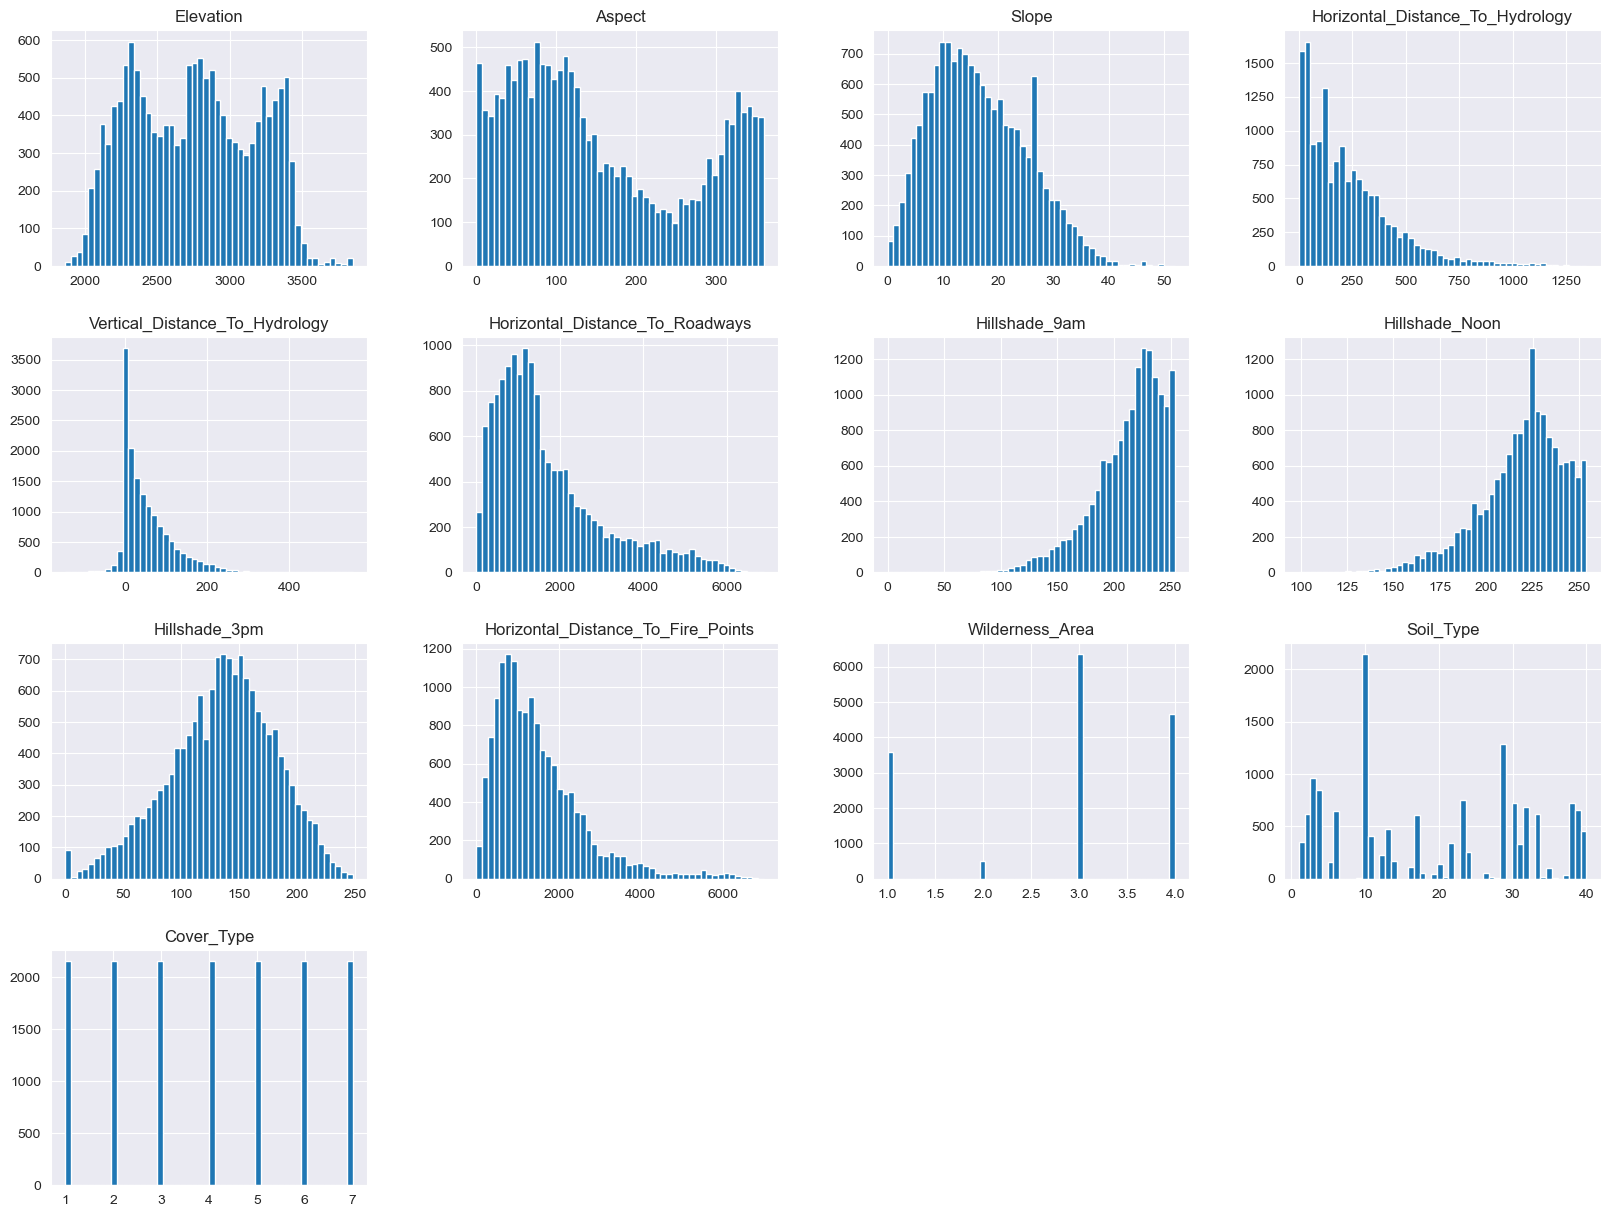

In [40]:
df = pd.read_csv('data/forest_data.csv', index_col='Id')
target = 'Cover_Type'
print(len(df.columns))
df.hist(bins=50, figsize=(20, 15))

####
<div style="border-radius:10px; border:#590d0d solid; padding: 15px; background-color: #d4ebea; font-size:100%; text-align:left">
    
<h2 align="center" style='text-decoration:underline;'> Correlation Analysis</h2>

When looking at the correlation between the Cover type (our target) and the rest of the features in the dataset there are no strong correlation we can find. The highest one is a positive one with Wilderness Area, however with only 0.2. 

We have some other interesting correlations down to note (non-exhaustive), __but remember to note that any conclusions made out of the correlation are just hypothesis that might need validation.__

- *HIllshade_9am and HIllshade_3pm:* High negative correlation of -0.78. Sounds logical if you think of the sun trajectory above a hill over the course of the day.
- *Hillshade_Noon and Hillshade_3pm:* Positive Correlation of 0.66.
- *Aspect and Hillshade_9am / Aspect and Hillshade_3pm:* With the former being -0.59 and the latter being 0.63 they show that the Hillshade_9am and the Hillshade_3pm have a very similar but inverse relationship to Aspect. Again, thinking of a sun’s trajectory over a hill and the Aspect describing which direction the point is facing (e.g east-facing/west-facing), it makes sense.
- *Soil_type and Elevation:* The highest correlation with 0.83. The reason for that is not clear for now, however this is where Subject Matter Experts are important! At this point you should start thinking about contacting them to help describe why is there a strong relationship

In [41]:
attributes = df.copy()
corr_matrix = attributes.corr()
corr_matrix['Elevation'].sort_values(ascending=False)

Elevation                             1.000000
Soil_Type                             0.826721
Horizontal_Distance_To_Roadways       0.578659
Horizontal_Distance_To_Fire_Points    0.443563
Horizontal_Distance_To_Hydrology      0.412712
Hillshade_Noon                        0.215782
Vertical_Distance_To_Hydrology        0.122092
Hillshade_9am                         0.097900
Hillshade_3pm                         0.089518
Cover_Type                            0.016090
Aspect                               -0.011096
Slope                                -0.312640
Wilderness_Area                      -0.616460
Name: Elevation, dtype: float64

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x17c6f5e10>


Text(0.5, 1.0, 'Correlation Matrix')

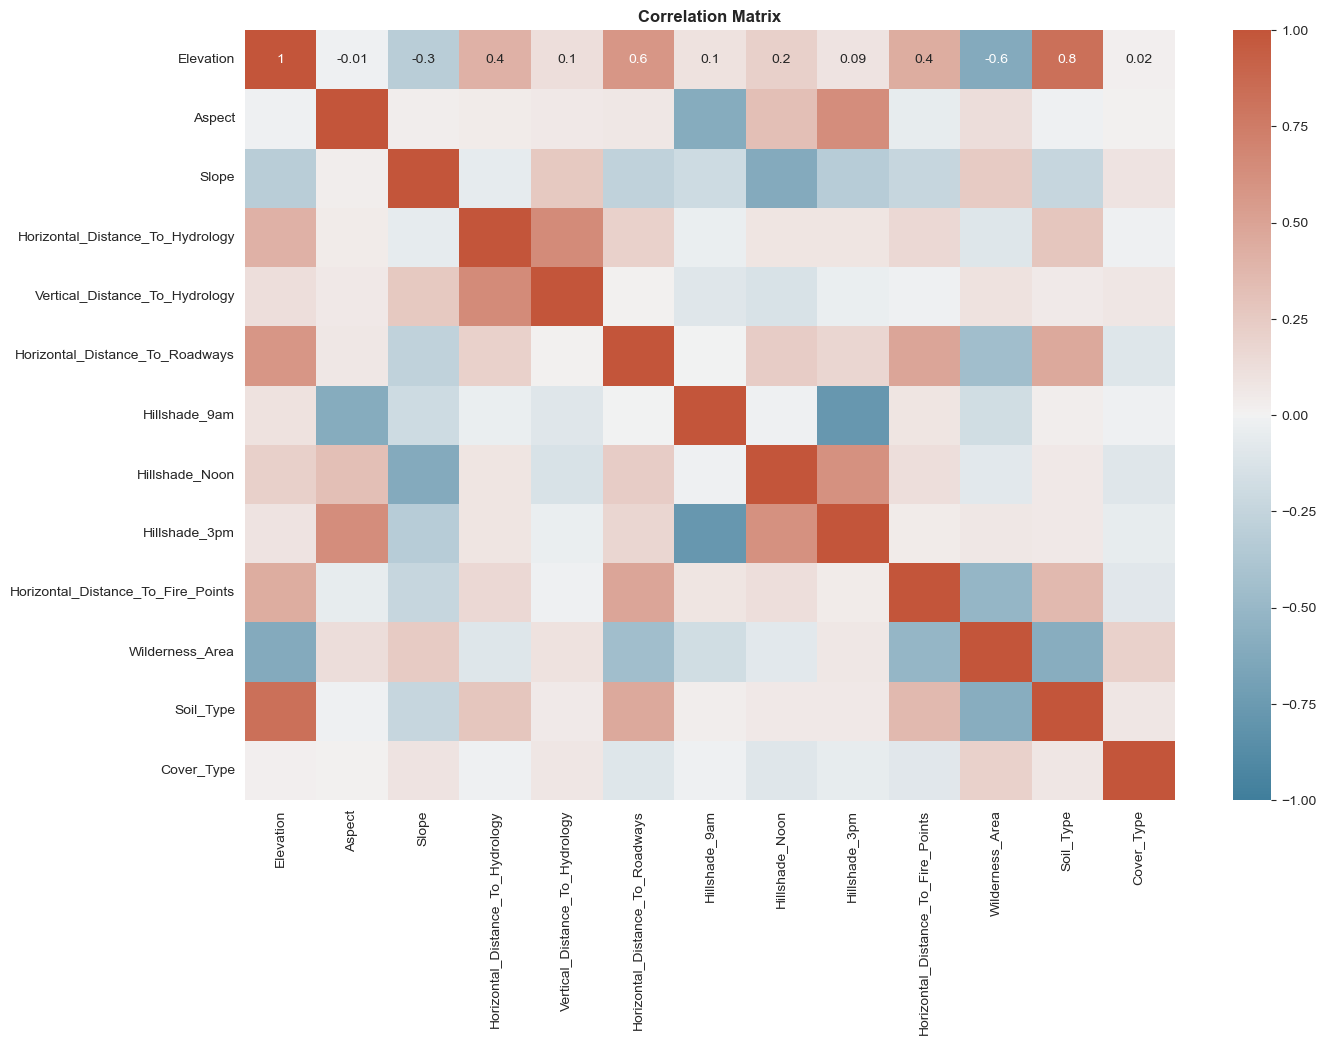

In [42]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 10))
sns.heatmap(attributes.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

####
<div style="border-radius:10px; border:#590d0d solid; padding: 15px; background-color: #d4ebea; font-size:100%; text-align:left">
    
<h2 align="center" style='text-decoration:underline;'> Training Data split </h2>

We check if the data classes are balanced. With exactly 2160 per class, The dataset is perfectly balanced and no further work is required. We create a random split with a fixed seed to be always able to reproduce the specfic split. 



In [43]:
df[target].value_counts().sort_index()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

In [44]:
df.dropna(inplace = True)
y = df[target]
X = df.drop(target, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42 )

###

<div style="border-radius:10px; border:#590d0d solid; padding: 15px; background-color: #d4ebea; font-size:100%; text-align:left">
    
<h2 align="center" style='text-decoration:underline;'> Feature Engineering </h2>

We apply basic feature engineering to the dataset where we <br>

1. __Apply One Hot Encoding__ : Although our categorical features ('Wilderness_Area' and 'Soil_Type') are already integer encoded, integer encoding might imply an ordinal relationship. This is not the case here and therefore we apply One Hot Encoding
2. __Scale the numerical features__: As we know from looking at our attributes they have very different scales. Having all the data on the scale is important to avoid scenarios where one feature would have more impact only due to the different scale magnifying its effect

Other ideas that coule have been done are __Calculating the Euclidean Distance to the hydrology__ or __assigning a fire hazard score based on the distance to the road and distance to the ignition point__ 

Finally we create a sperate training/test dataset with the changes to compare the effects later 

In [45]:
cat_cols = ['Wilderness_Area', 'Soil_Type']
num_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

col_transformer = make_column_transformer(
        (OneHotEncoder(), cat_cols),
        remainder=StandardScaler())
X_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type'],
      dtype='object')

In [46]:
X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

## <p style="font-weight:bold; color:#00747b; font-size:140%; text-align:left;padding: 0; margin: 0; border-bottom: 3px solid #00747b">Model Training </p>

###
<div style="border-radius:10px; border:#590d0d solid; padding: 15px; background-color: #d4ebea; font-size:100%; text-align:left">
    
<h2 align="center" style='text-decoration:underline;'> Base Model </h2>

In the Base Model part we establish our two simple baselines. Here we train two models (Logistic Regressiona and Random Forest) on the raw data without the feature engineering applied. We inspect the perfromance of those model on the test data and establish their low performance namely of 0.49 and 0.87. We hold on till we see the performance on the transformed data. 


In [47]:
mdl_log_regression, search_space_log_regression = factory.generate_model_and_search_space(Models.LOG_REGRESSION)
mdl_random_forest, search_space_random_forest = factory.generate_model_and_search_space(Models.RANDOM_FOREST)

search_space_log_regression

{'solver': ['newton-cg', 'lbfgs'],
 'penalty': ['l2', 'none'],
 'C': [1, 10, 20, 50]}

In [48]:
mdl_log_regression.fit(X_train, y_train)

/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
mdl_log_regression.score(X_train, y_train)

0.4882716049382716

In [50]:
mdl_log_regression.score(X_test, y_test)

0.4936507936507937

In [51]:
mdl_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
mdl_random_forest.score(X_train, y_train)

1.0

In [53]:
mdl_random_forest.score(X_test, y_test)

0.8634920634920635

###

<div style="border-radius:10px; border:#590d0d solid; padding: 15px; background-color: #d4ebea; font-size:100%; text-align:left">
    
<h2 align="center" style='text-decoration:underline;'> Models trained on transformed data </h2>

Here we see a signifcant imporvement in the performance of Logistic Regression. Using transformed data the performance of Logistic regressions rises from 0.49 to 0.71. The Random forest stays relatively the same 


In [54]:
mdl_log_regression, search_space_log_regression = factory.generate_model_and_search_space(Models.LOG_REGRESSION)
mdl_random_forest, search_space_random_forest = factory.generate_model_and_search_space(Models.RANDOM_FOREST)

In [55]:
mdl_log_regression.fit(X_train_transformed, y_train)

/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
mdl_log_regression.score(X_train_transformed, y_train)

0.7114638447971782

In [57]:
mdl_log_regression.score(X_test_transformed, y_test)

0.7137566137566138

In [58]:
mdl_random_forest.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [59]:
mdl_random_forest.score(X_train_transformed, y_train)

1.0

In [60]:
mdl_random_forest.score(X_test_transformed, y_test)

0.867989417989418

###

<div style="border-radius:10px; border:#590d0d solid; padding: 15px; background-color: #d4ebea; font-size:100%; text-align:left">
    
<h2 align="center" style='text-decoration:underline;'> Hyperparameter Tuning </h2>
 
Finally we apply Hyperparameter tuning to find the best possible parameters for our model. We log the times for future reference. 


In [64]:
with exp:
    search = GridSearchCV(mdl_random_forest, search_space_random_forest, n_jobs=2)
    exp.run_experiment(search, X_train_transformed, X_test_transformed, y_train, y_test)

INFO:root:####### Starting Experiment dated 111223@18:46 #######

INFO:root:Hyperparameter tuining experiment
INFO:root:Model type: str
DEBUG:root:The experiment object is a tuner 
/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
DEBUG:root:The model is RandomForestClassifier(bootstrap=False, n_estimators=200)
INFO:root:Best parameter (CV score=0.861):
INFO:root:That following models had the following best parameters {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 200}
INFO:root:Elapsed Time 185.165
INFO:root:####### End of Experiment ####### 



In [65]:
logging.debug('The search space is as follows: %s', search_space_log_regression )
with exp:
    search = GridSearchCV(mdl_log_regression, search_space_log_regression, n_jobs=2)
    exp.run_experiment(search, X_train_transformed, X_test_transformed, y_train, y_test)

DEBUG:root:The search space is as follows: {'solver': ['newton-cg', 'lbfgs'], 'penalty': ['l2', 'none'], 'C': [1, 10, 20, 50]}
INFO:root:####### Starting Experiment dated 111223@18:49 #######

INFO:root:Hyperparameter tuining experiment
INFO:root:Model type: str
DEBUG:root:The experiment object is a tuner 
/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (